In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot
from joblib import dump, load
%matplotlib inline

In [2]:
# specify the dataset settings (a mixutre of gaussian)
pi = numpy.array([0.5, 0.5])
ita_0 = numpy.array([0.5, 0.5])
ita_1 = numpy.array([0.5, 0.5])
mu_0_0 = numpy.array([4.0])
mu_0_1 = numpy.array([-64.0])
mu_1_0 = numpy.array([-4.0])
mu_1_1 = numpy.array([72.0])
cov_0_0 = numpy.array([960.0])
cov_0_1 = numpy.array([1280.0])
cov_1_0 = numpy.array([980.0])
cov_1_1 = numpy.array([1024.0])

pi3 = numpy.ones(3) / 3
ita_2 = numpy.array([0.5, 0.5])
mu_2_0 = numpy.array([0.0])
mu_2_1 = numpy.array([0.0])
cov_2_0 = numpy.array([8.0])
cov_2_1 = numpy.array([8.0])

In [3]:
N = 10000
N_grid = 50
edge = 160.0
v_edge = 160.0
x_mesh = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)
x_mesh_raw = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)

# calculate the corresponding densities and probabilities

p_x_y = numpy.vstack([pi3[0] * ita_0[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_0, cov=cov_0_0) +                           pi3[1] * ita_0[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_0_1, cov=cov_0_1),
                      pi3[1] * ita_1[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_0, cov=cov_1_0) +
                      pi3[1] * ita_1[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_1_1, cov=cov_1_1),
                      pi3[2] * ita_2[0] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_2_0, cov=cov_2_0) +
                      pi3[2] * ita_2[1] * scipy.stats.multivariate_normal.pdf(x=x_mesh, mean=mu_2_1, cov=cov_2_1)])

p_x = numpy.sum(p_x_y, axis=0)

p_y_g_x = p_x_y / p_x

p_x = p_x
p_x_y = p_x_y
p_x_g_y = p_x_y / pi3.reshape(-1, 1)

x = numpy.load('./data/x3' + '_' + str(N) + '.npy')

y = numpy.load('./data/y3' + '_' + str(N) + '.npy')

mdl = load('models/mlp_3.joblib')

/home/sh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/sh/anaconda3/lib/python3.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


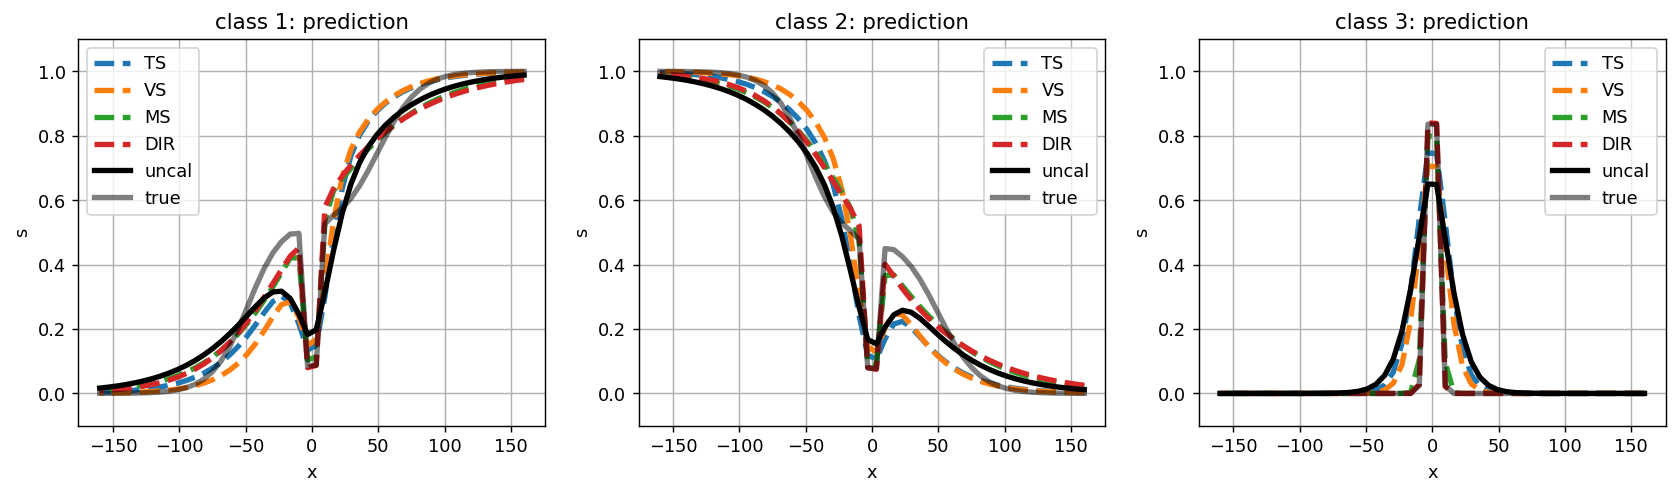

In [4]:
cal_list = ['TS', 'VS', 'MS', 'DIR']

N_grid = 50
edge = 160.0
v_edge = 160.0
x_mesh = numpy.linspace(-edge, edge, N_grid).reshape(-1, 1)
s_mesh = mdl.predict_proba(x_mesh)

fig, ax_list = matplotlib.pyplot.subplots(ncols=3, nrows=1, dpi=128, figsize=(16, 4))

for i in range(0, len(cal_list)):
    cal_ref = cal_list[i]
    s_cal_mesh = numpy.load('./data/case_' + cal_ref + '_s_cal_mesh.npy')
    for j in range(0, 3):
        ax_list[j].plot(-x_mesh, s_cal_mesh[:, j], linestyle='--', linewidth=3.0)

for j in range(0, 3):
    ax_list[j].plot(-x_mesh, s_mesh[:, j], 'k', linewidth=3.0)
    ax_list[j].plot(-x_mesh_raw, p_y_g_x[j], 'k', linewidth=3.0, alpha=0.5)
    ax_list[j].set_xlabel('x')
    ax_list[j].set_ylabel('s')
    ax_list[j].set_title('class ' + str(j + 1) + ': prediction')
    ax_list[j].set_ylim([-0.1, 1.1])
    ax_list[j].grid()
    ax_list[j].legend(cal_list + ['uncal', 'true'])

matplotlib.pyplot.savefig('./figures/all3_prediction')

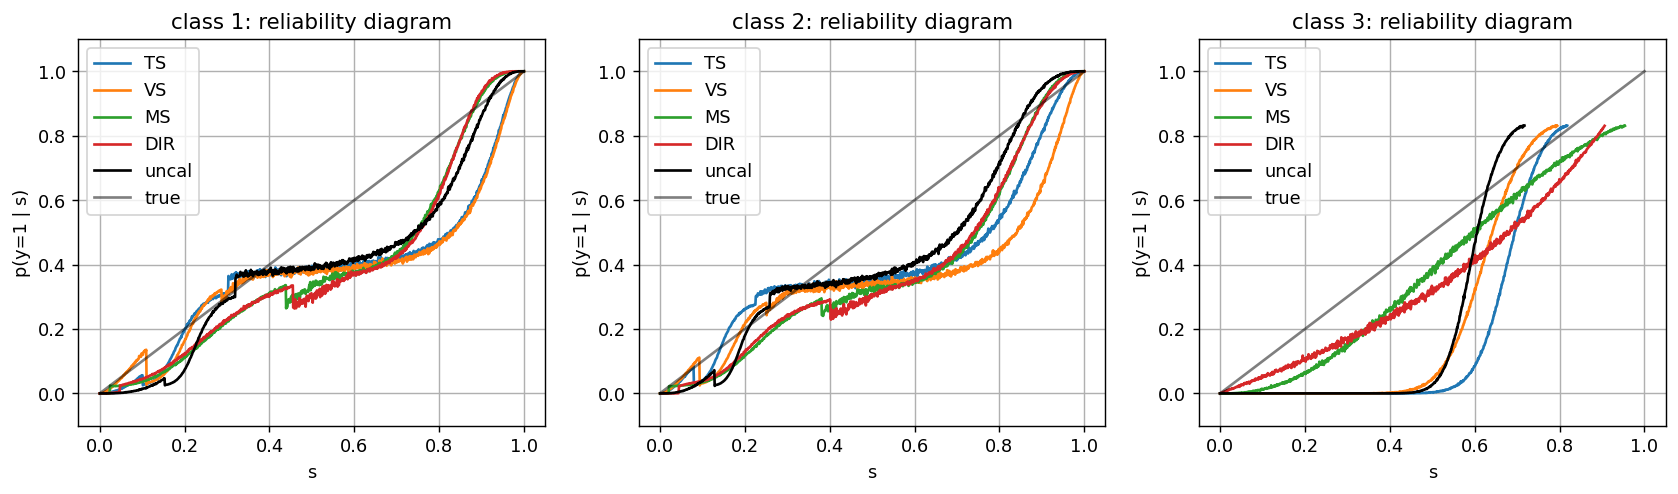

In [5]:
N_grid = 1024
fig, ax_list = matplotlib.pyplot.subplots(ncols=3, nrows=1, dpi=128, figsize=(16, 4))

for i in range(0, len(cal_list)):
    cal_ref = cal_list[i]
    for j in range(0, 3):
        p_y_hat_hat = numpy.load('./data/case_' + cal_ref + '_p_y_hat_hat' + '_' + str(j) + '.npy')
        ax_list[j].plot(numpy.linspace(0, 1, N_grid - 1), p_y_hat_hat[0, :])

for j in range(0, 3):
    p_y_hat = numpy.load('./data/case_' + cal_ref + '_p_y_hat' + '_' + str(j) + '.npy')
    ax_list[j].plot(numpy.linspace(0, 1, N_grid - 1), p_y_hat[0, :], 'k')
    ax_list[j].plot(numpy.linspace(0, 1, N_grid - 1), numpy.linspace(0, 1, N_grid - 1), 'k', markersize=1.0, alpha=0.5)
    ax_list[j].set_xlabel('s')
    ax_list[j].set_ylabel('p(y=1 | s)')
    ax_list[j].set_title('class ' + str(j + 1) + ': reliability diagram')
    ax_list[j].set_ylim([-0.1, 1.1])
    ax_list[j].grid()
    ax_list[j].legend(cal_list + ['uncal', 'true'])

matplotlib.pyplot.savefig('./figures/all3_reliability')

